# Membangkitkan Keadaan Nonklasik

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from jc_model import *
%matplotlib inline

In [2]:
wa = 2*np.pi     #frekuensi atom
wc_list = [0.1*wa, 0.5*wa, 1.0*wa]          #frekuensi medan
N = 15
use_rwa = False
tlist = np.linspace(0,100,301)

#oprator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus

## Keadaan entangled

In [3]:
g_list = np.linspace(0, 3, 30)*wa # Kuat interaksi
entropy_list = np.zeros([len(wc_list), len(g_list)])
for i, wc in enumerate(wc_list):
    for j, g in enumerate(g_list):
        # Hitung Hamiltonian
        H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
        # menghitung ground state & energinya
        _, gnd_state = H.groundstate()
        entropy_list[i,j] = Entropy(gnd_state)

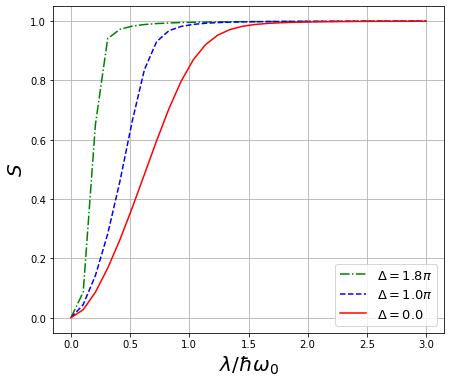

In [4]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(7,6))
#axes.set(xlim=(0, 5), ylim=(0, 1.05))
axes.plot(g_list/wa, entropy_list[0], 'g-.', label=r"$\Delta=1.8\pi$")
axes.plot(g_list/wa, entropy_list[1], 'b--', label=r"$\Delta=1.0\pi$")
axes.plot(g_list/wa, entropy_list[2], 'r-', label=r"$\Delta=0.0$")
axes.legend(loc=0,  fontsize=13)
axes.set_xlabel(r'$\lambda/\hbar\omega_{0}$', fontsize=20)
axes.set_ylabel(r'$S$', fontsize=20)
axes.grid()
plt.savefig('entropi.pdf')  

## Keadaan Schrödinger-cat
* $\Delta=1.8\pi$

In [5]:
g_list = np.array([0.1, 0.2, 0.25])*2*np.pi

In [6]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[0], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

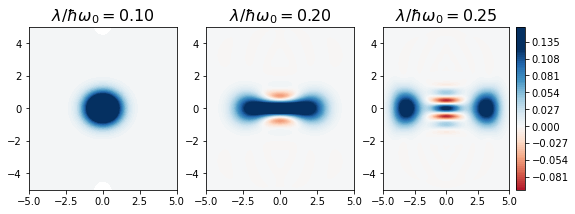

In [7]:
xvec = np.linspace(-5,5,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung wigner function
    W = Wigner(psi=psi, xvec=xvec, yvec=xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    cs = axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.2f$" % g_plot, fontsize=16)
fig.colorbar(cs, fraction=.1)
plt.savefig('Plot_wigner_1.pdf')

* $\Delta=1.0\pi$

In [8]:
g_list = np.array([0.5, 0.7, 1.0])*2*np.pi

In [9]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[1], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

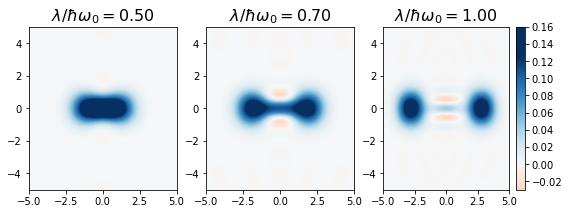

In [10]:
xvec = np.linspace(-5,5,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung wigner function
    W = Wigner(psi=psi, xvec=xvec, yvec=xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    cs = axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.2f$" % g_plot, fontsize=16)
fig.colorbar(cs, fraction=.1)
plt.savefig('Plot_wigner_2.pdf')

* $\Delta=0.0$

In [11]:
g_list = np.array([0.6, 1.2, 1.8])*2*np.pi

In [12]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[2], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

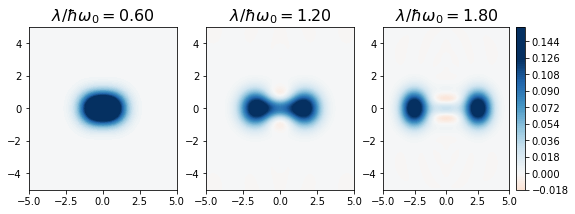

In [13]:
xvec = np.linspace(-5,5,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung wigner function
    W = Wigner(psi=psi, xvec=xvec, yvec=xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    cs = axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.2f$" % g_plot, fontsize=16)
fig.colorbar(cs, fraction=.1)
plt.savefig('Plot_wigner_3.pdf')